# Download the CAR DETAILS dataset and perform Data cleaning
## and Data Pre-Processing if Necessary

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv('CAR DETAILS.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [141]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,1,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,1,2


In [144]:
df.tail(100)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4170,Tata Harrier XZ BSIV,2019,1400000,33000,Diesel,Individual,1,0
4171,Hyundai EON Era Plus,2013,219000,53500,Petrol,Individual,1,4
4172,Maruti Ertiga SHVS LDI,2017,500000,40000,Diesel,Individual,1,0
4193,Honda City 1.5 S MT,2010,409999,60000,Petrol,Individual,1,0
4194,Tata Tigor 1.2 Revotron XZ Option,2018,570000,5000,Petrol,Individual,1,0
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,1,2
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,1,0


In [145]:
df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [146]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [147]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [148]:
df['transmission'].unique()

array([1, 0])

In [149]:
df['owner'].unique()

array([0, 2, 1, 4, 3])

# Data Preprocessing

# Handling Null Values

In [150]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [151]:
df.duplicated().sum()

0

In [152]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Separate continous and categorical features

In [153]:
cat_cols=df.dtypes[df.dtypes=='object'].index
num_cols=df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['name', 'fuel', 'seller_type'], dtype='object')
Index(['year', 'selling_price', 'km_driven', 'transmission', 'owner'], dtype='object')


# Exploring and cleaning categorical features

In [154]:
for i in cat_cols:
    print(f'Feature:{i}, | Count of Unique: {df[i].nunique()}')
    print(f'value_counts{df[i].unique()}')
    print('*'*50)

Feature:name, | Count of Unique: 1491
value_counts['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
**************************************************
Feature:fuel, | Count of Unique: 5
value_counts['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
**************************************************
Feature:seller_type, | Count of Unique: 3
value_counts['Individual' 'Dealer' 'Trustmark Dealer']
**************************************************


# Cleaning Extra Spaces

In [155]:
for i in cat_cols:
    df[i]=df[i].apply(lambda x:x.strip())

In [156]:
for i in cat_cols:
    print(f'Feature:{i},  | Count of Unique:{df[i].nunique()}')
    print(f'value_counts{df[i].unique()}')
    print('*'*50)

Feature:name,  | Count of Unique:1491
value_counts['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
**************************************************
Feature:fuel,  | Count of Unique:5
value_counts['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
**************************************************
Feature:seller_type,  | Count of Unique:3
value_counts['Individual' 'Dealer' 'Trustmark Dealer']
**************************************************


In [157]:
print(cat_cols)

Index(['name', 'fuel', 'seller_type'], dtype='object')


In [158]:
df['name'].value_counts()

name
Maruti Swift Dzire VDI               54
Maruti Alto 800 LXI                  48
Maruti Alto LXi                      42
Maruti Alto LX                       30
Maruti Swift VDI BSIV                28
                                     ..
Toyota Innova 2.5 E 8 STR             1
Nissan Micra XL CVT                   1
Mahindra Scorpio VLX AT 2WD BSIII     1
Toyota Corolla AE                     1
Hyundai i20 Magna 1.4 CRDi            1
Name: count, Length: 1491, dtype: int64

In [159]:
df['fuel'].value_counts()

fuel
Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64

In [160]:
df['seller_type'].value_counts()

seller_type
Individual          2832
Dealer               712
Trustmark Dealer      33
Name: count, dtype: int64

In [161]:
df['transmission'].value_counts()

transmission
1    3265
0     312
Name: count, dtype: int64

In [162]:
df['owner'].value_counts()

owner
0    2218
2     978
4     289
1      75
3      17
Name: count, dtype: int64

# EDA

In [163]:
cat_cols=df.dtypes[df.dtypes=='object'].index
print(cat_cols)

Index(['name', 'fuel', 'seller_type'], dtype='object')


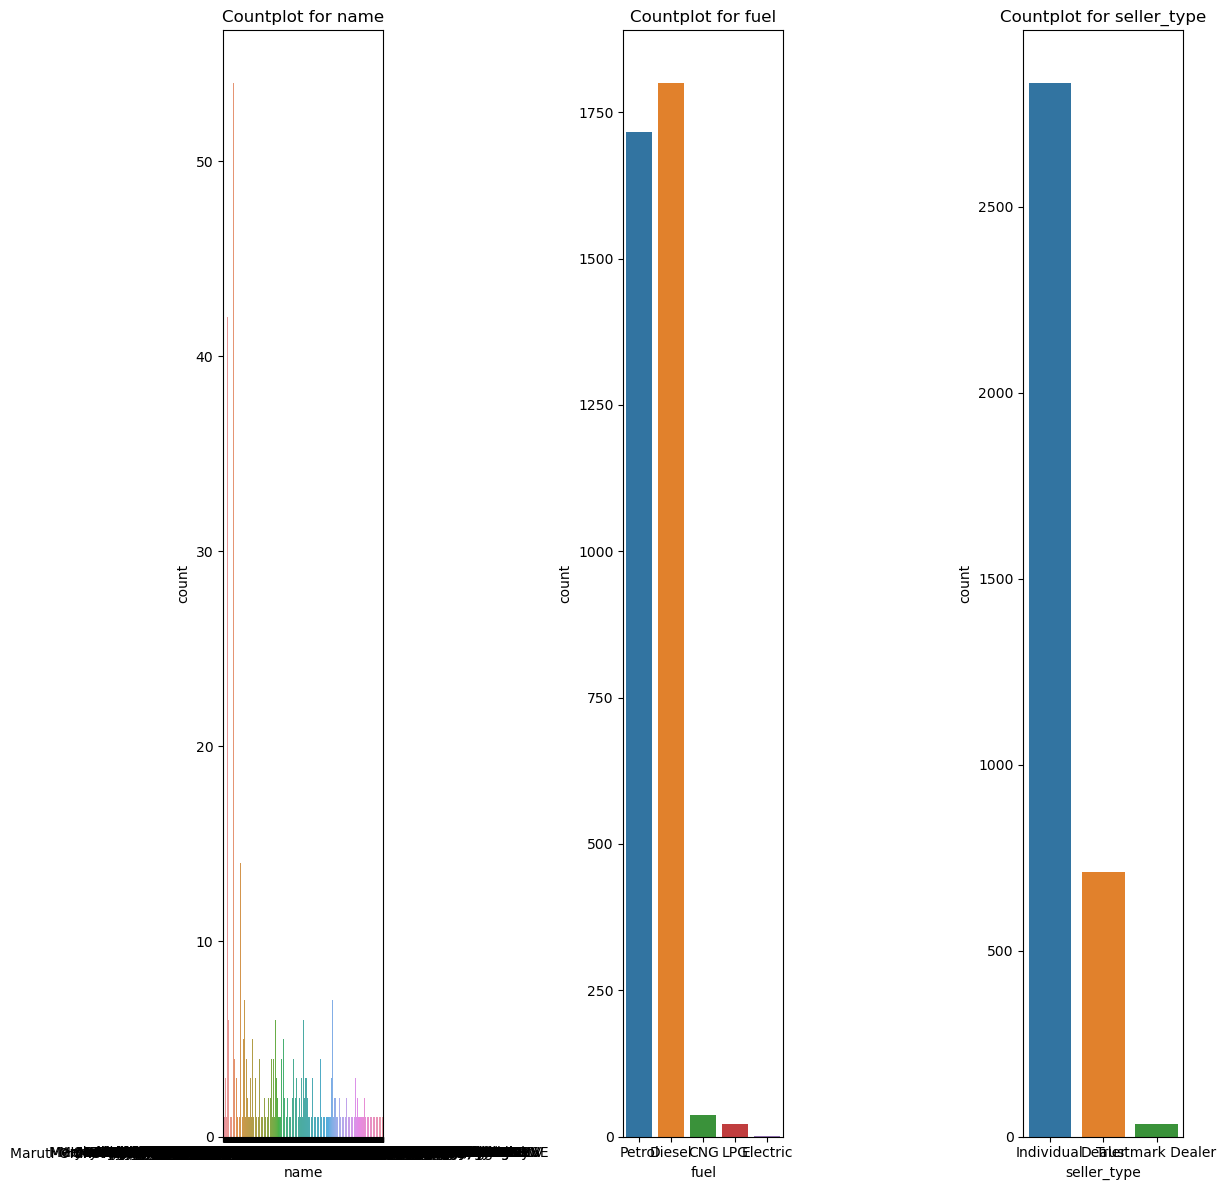

In [164]:
plt.figure(figsize=(20,12))
for i in range(len(cat_cols)):
    plt.subplot(1,5,i+1)
    sns.countplot(x=df[cat_cols[i]])
    plt.title(f'Countplot for {cat_cols[i]}')
    
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

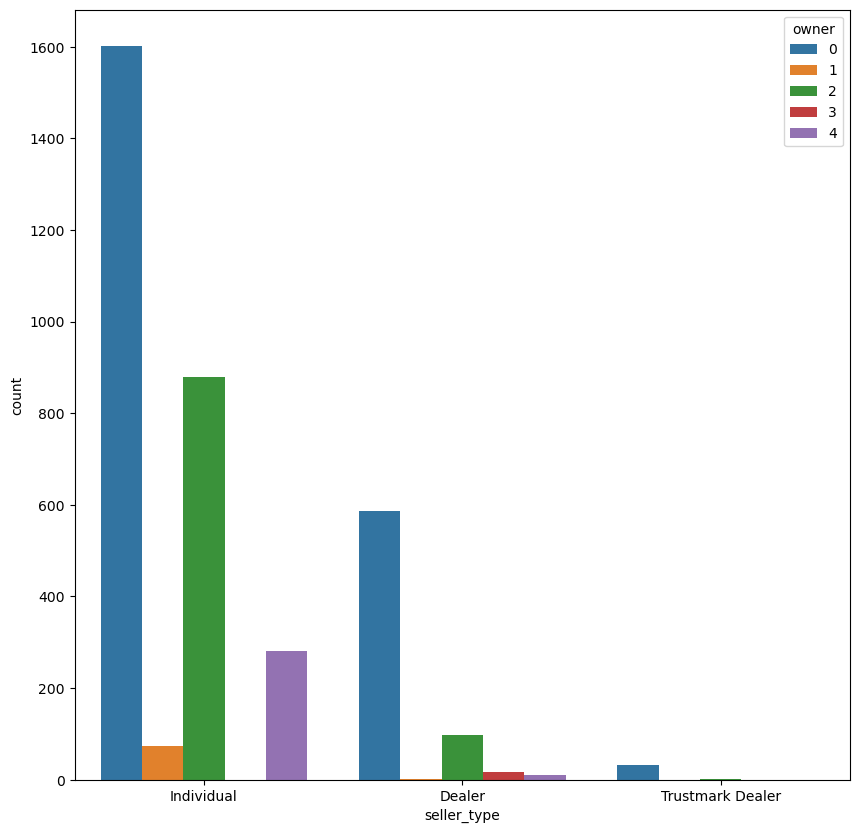

In [165]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['seller_type'],hue=df['owner'])
plt.show

In [166]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_cols= ['name','fuel','seller_type','transmission','owner']
one_hot=OneHotEncoder()
transformer= ColumnTransformer([("one_hot", one_hot, cat_cols)], remainder="passthrough")

transformed_X= transformer.fit_transform(df)
transformed_X

<3577x1509 sparse matrix of type '<class 'numpy.float64'>'
	with 28616 stored elements in Compressed Sparse Row format>

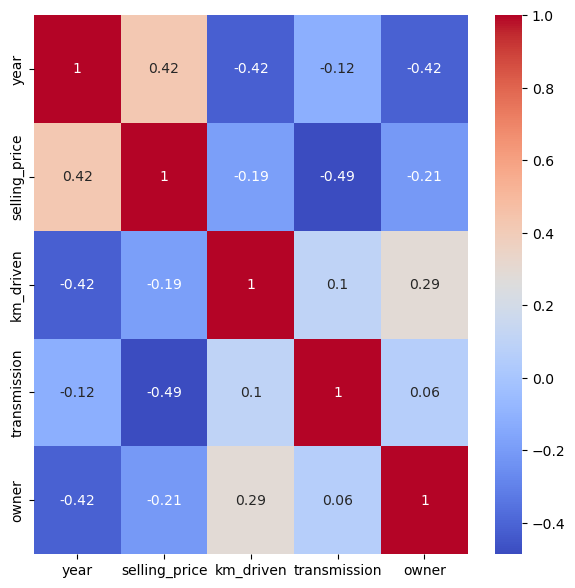

In [167]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

In [168]:
print(num_cols)

Index(['year', 'selling_price', 'km_driven', 'transmission', 'owner'], dtype='object')


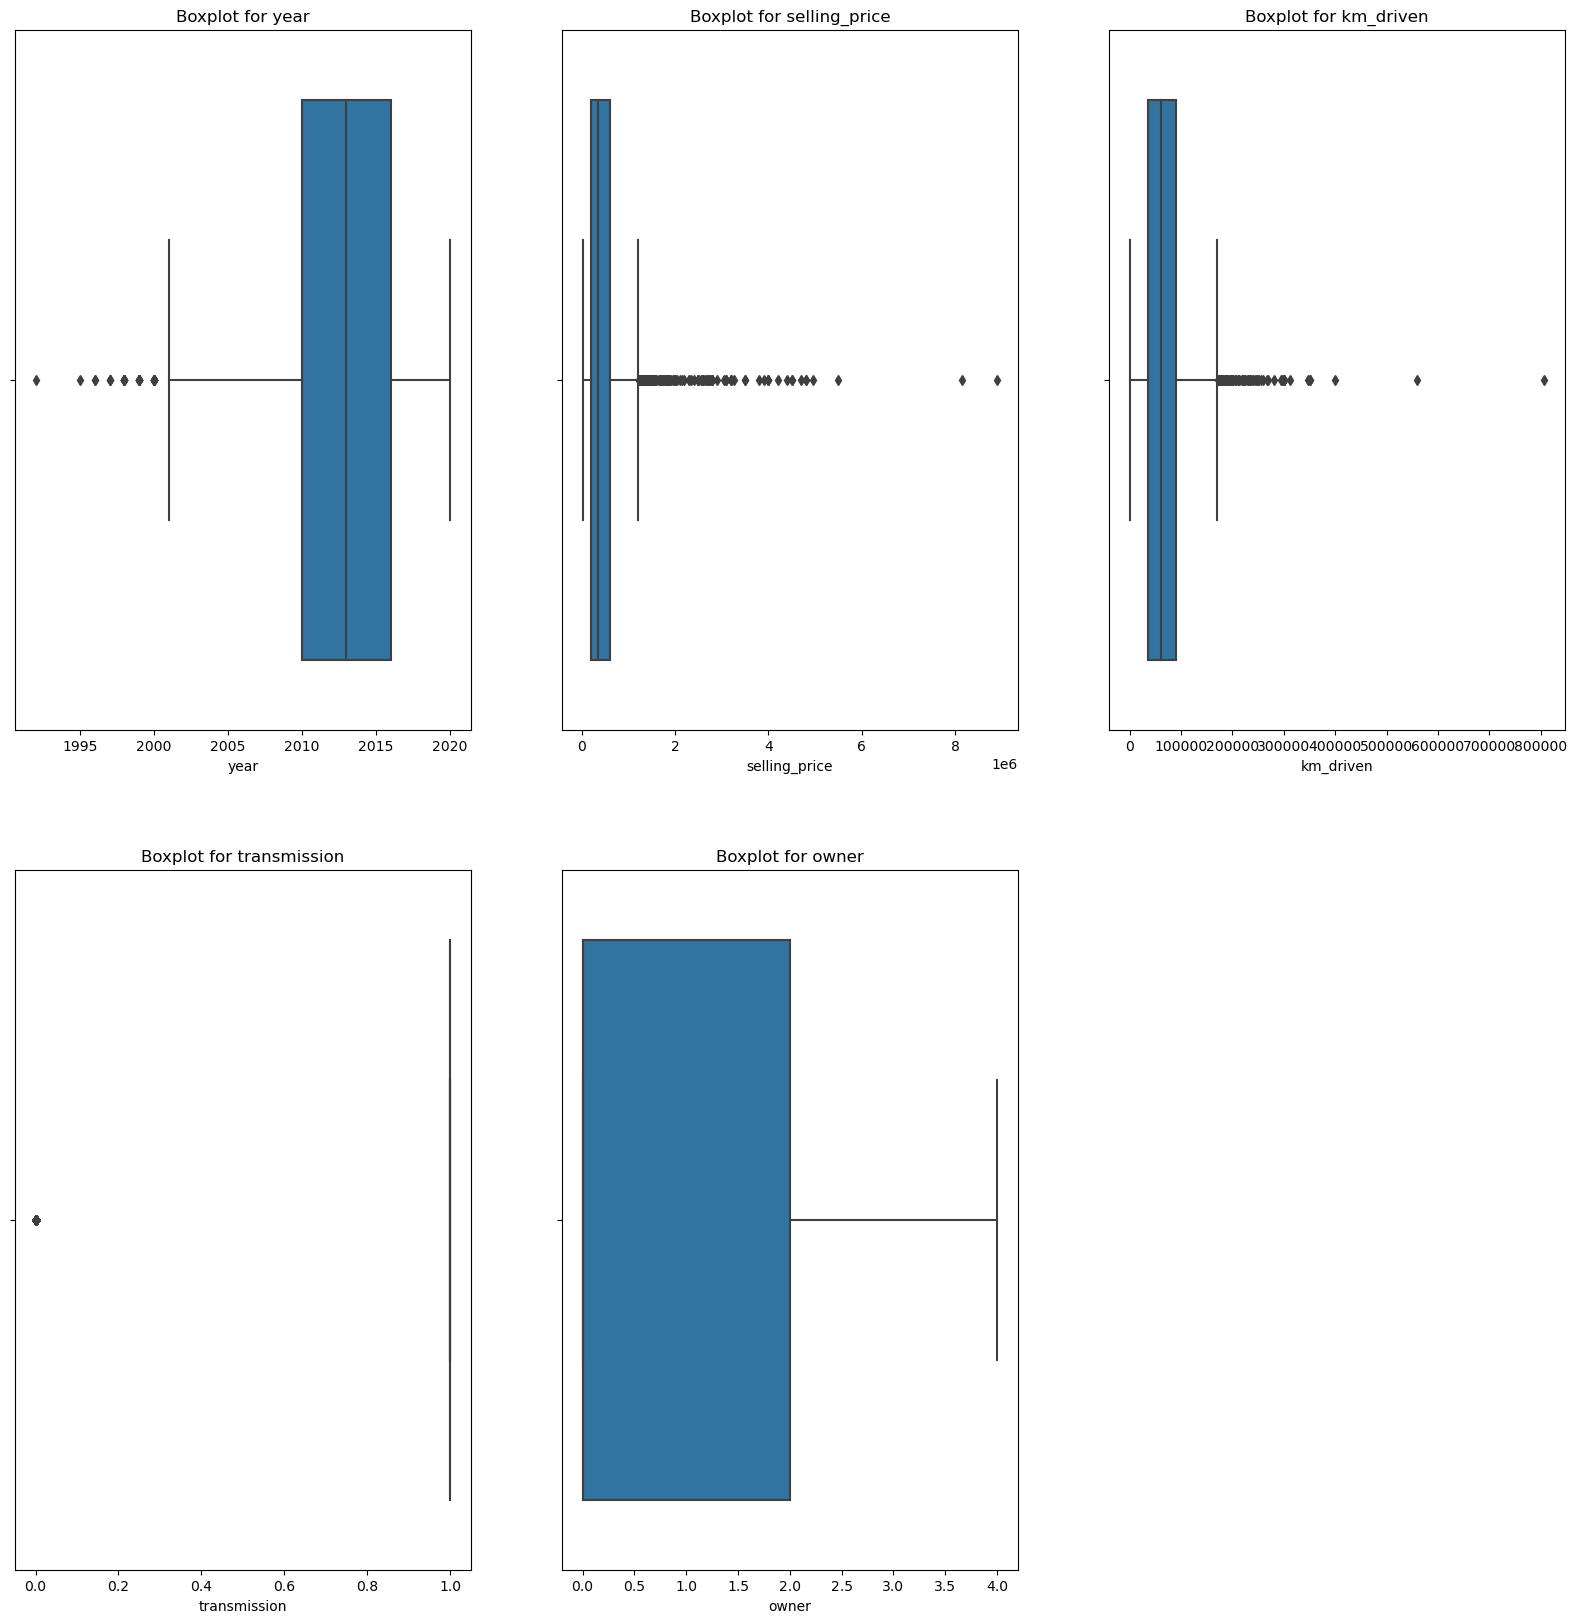

In [169]:
plt.figure(figsize=(20,20))
for i in range(len(num_cols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')
plt.show()

In [170]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,1,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,1,2


In [171]:
a=df[num_cols].describe(percentiles=[0.01,0.02,0.98,0.99]).T
a=a.iloc[:,3:]
a

,min,1%,2%,50%,98%,99%,max
year,1992.0,2000.00,2003.0,2013.0,2019.0,2020.0,2020.0
selling_price,20000.0,51786.64,60000.0,350000.0,1800000.0,2675000.0,8900000.0
km_driven,1.0,1744.08,5000.0,60000.0,193440.0,223158.4,806599.0
transmission,0.0,0.00,0.0,1.0,1.0,1.0,1.0
owner,0.0,0.00,0.0,0.0,4.0,4.0,4.0


## Perform Exploratory data analysis (EDA) on the Data and perform
## Graphical Analysis on the Data. Include the graphs with
## conclusions from the Graphical Analysis.

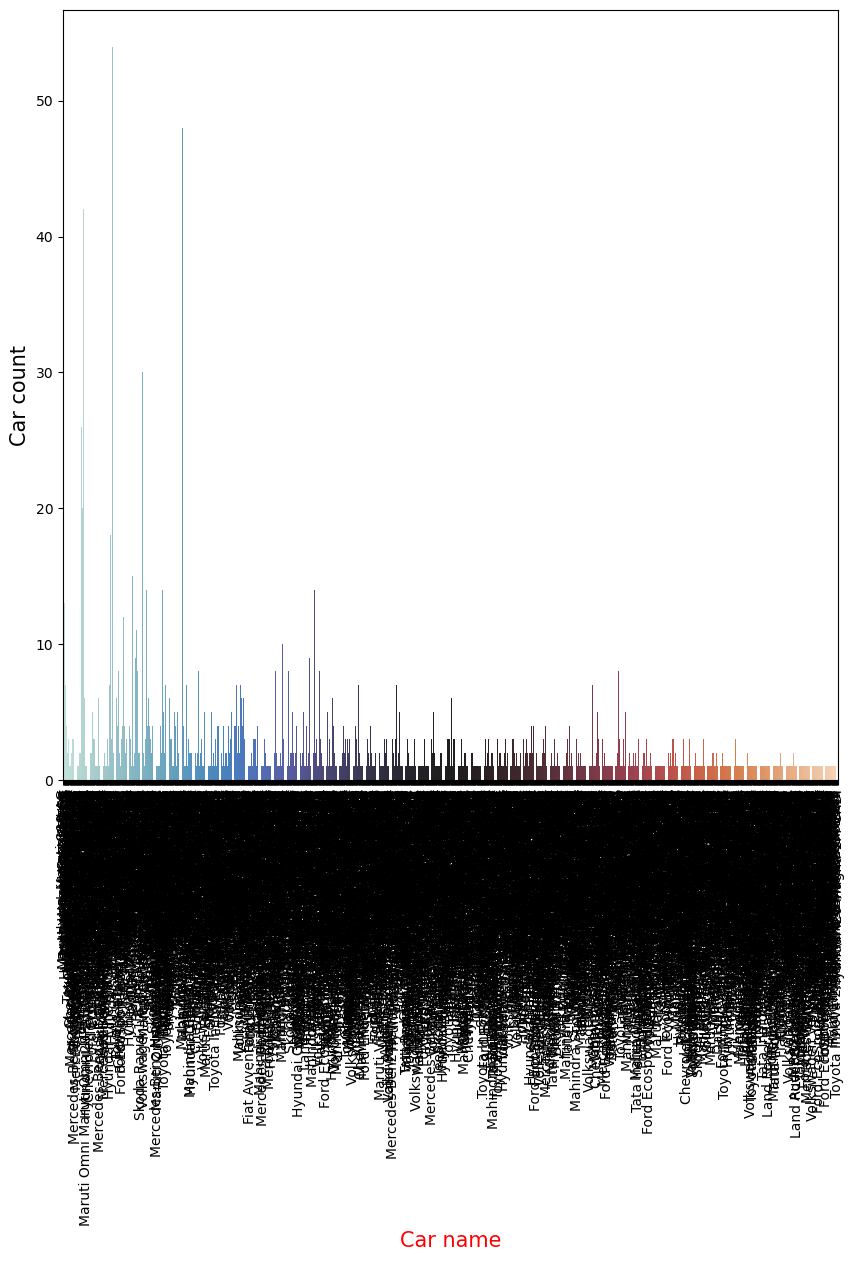

In [219]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x="name",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("Car name",fontsize=15,color="Red")
plt.ylabel("Car count",fontsize=15,color="black")
plt.show()

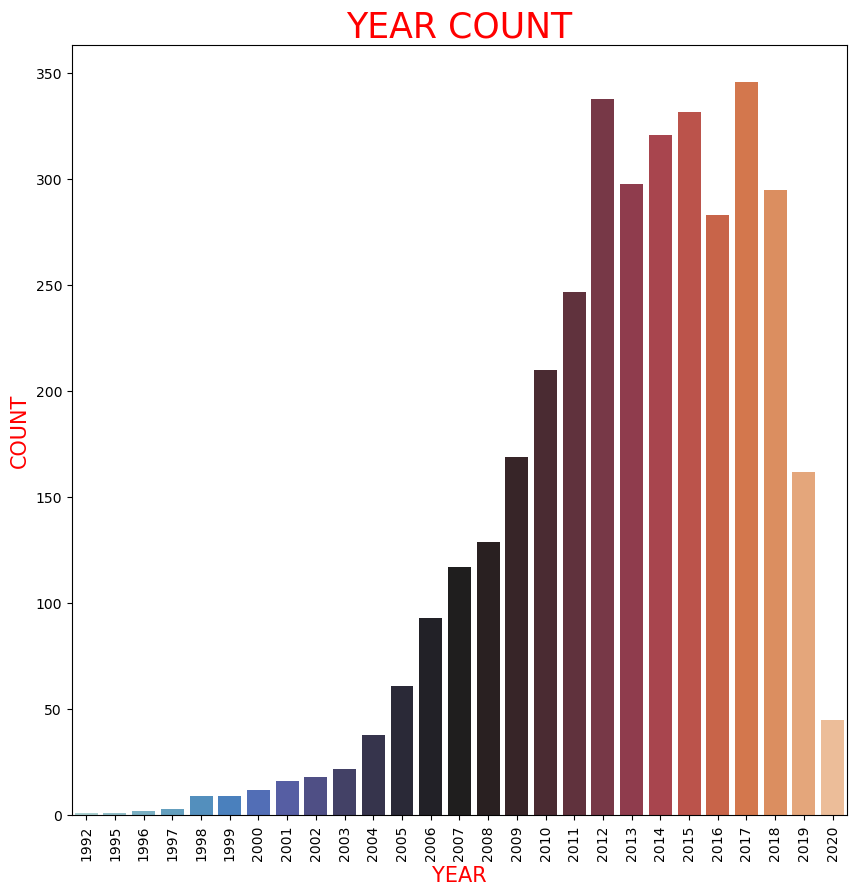

In [173]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x="year",palette="icefire")
plt.xticks(rotation=90)
plt.xlabel("YEAR",fontsize=15,color="RED")
plt.ylabel("COUNT",fontsize=15,color="RED")
plt.title("YEAR COUNT",fontsize=25,color="RED")
plt.show()

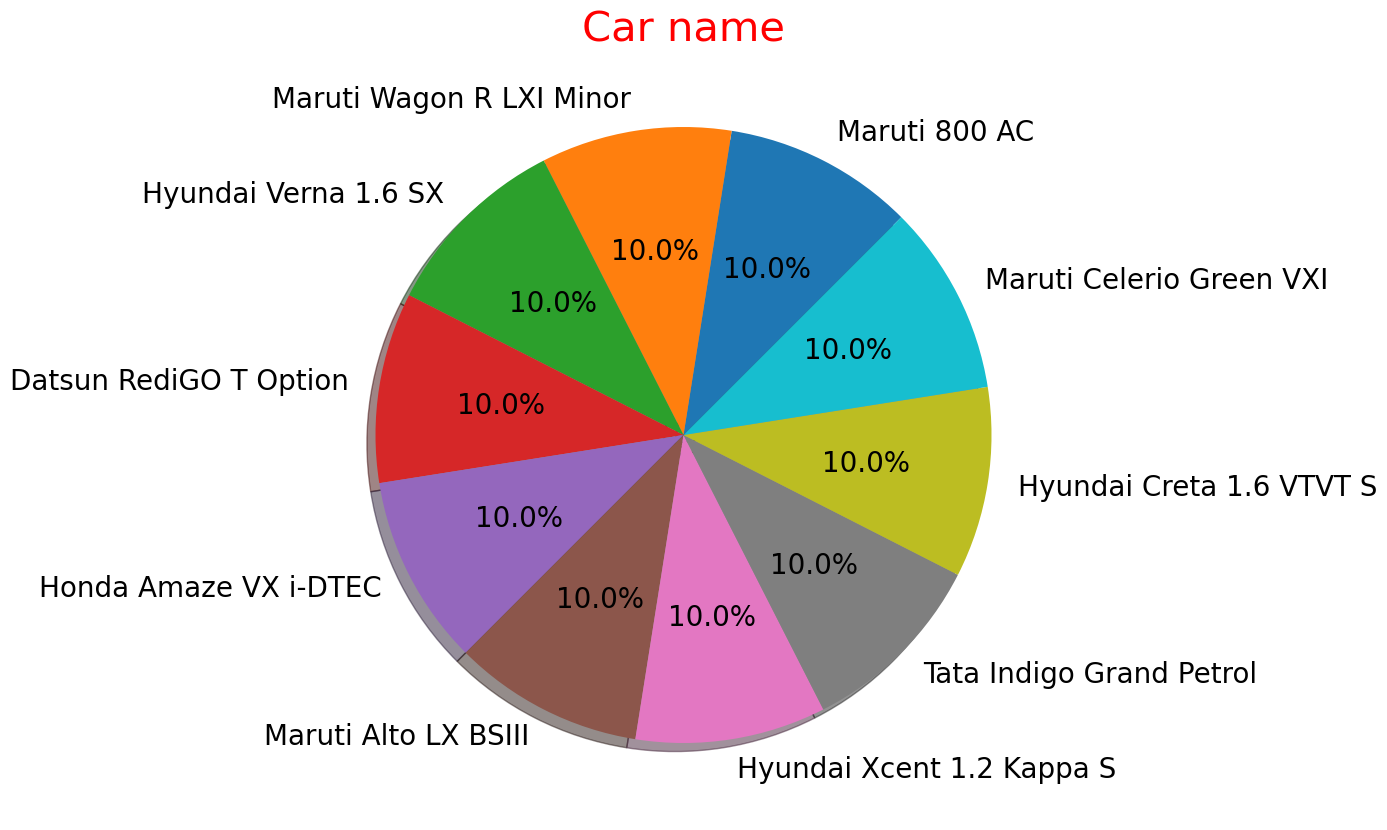

In [174]:
labels = df["name"][:10].value_counts().index
sizes = df["name"][:10].value_counts()
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=True, startangle=45,textprops={'fontsize':20})
plt.title('Car name',color = 'red',fontsize = 30)
plt.show()

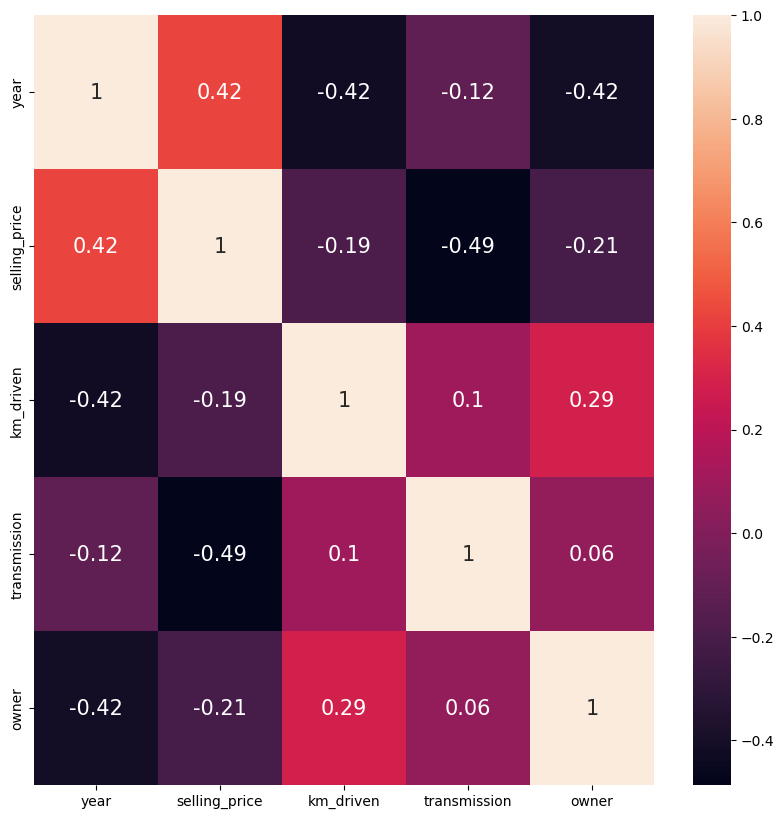

In [175]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(df.corr(numeric_only=True), annot=True,annot_kws={'fontsize':15})

# Use the various methods such as Handling null values, One-Hot
## Encoding, Imputation and Scaling of Data Pre-Processing where
## necessary.


In [176]:
from sklearn.preprocessing import LabelEncoder

In [177]:
lb = LabelEncoder()
for i in ['transmission','owner']:
    df[i] = lb.fit_transform(df[i])

In [178]:
df.head()
# Cat -> Continuous : Encodeing (LabelEncoder, Dummy Variable, One HOt Encoder)
# Cat -> Cat : Binning (Quartile Binning, Custom Binning)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,1,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,1,2


In [179]:
df_dum = pd.get_dummies(data=df,columns=['fuel','name','seller_type'],drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(3577, 1501)
Index(['year', 'selling_price', 'km_driven', 'transmission', 'owner',
       'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol',
       'name_Ambassador Classic 2000 Dsz',
       ...
       'name_Volkswagen Vento Magnific 1.6 Highline',
       'name_Volkswagen Vento New Diesel Highline',
       'name_Volkswagen Vento Petrol Highline',
       'name_Volkswagen Vento Petrol Highline AT',
       'name_Volvo V40 D3 R Design', 'name_Volvo XC 90 D5 Inscription BSIV',
       'name_Volvo XC60 D3 Kinetic', 'name_Volvo XC60 D5 Inscription',
       'seller_type_Individual', 'seller_type_Trustmark Dealer'],
      dtype='object', length=1501)


In [180]:
#### Select x and y

In [181]:
x = df_dum.drop('selling_price',axis=1)
y = df_dum['selling_price']
print(x.shape)
print(y.shape)

(3577, 1500)
(3577,)


In [182]:
from sklearn.model_selection import train_test_split

In [183]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2682, 1500)
(895, 1500)
(2682,)
(895,)


In [184]:
#### Create a function to evaluate the model


In [185]:
from sklearn.metrics import *

In [186]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,ypred)
    test_mse = mean_squared_error(y_test,ypred)
    test_rmse = np.sqrt(test_mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,
                        'Test_MSE':test_mse,'Test_RMSE':test_rmse,'Test_MAE':test_mae},
                       index=[mname])
    return res

In [187]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [188]:
#### Model Building

In [189]:
#### 1) Lin Reg

In [190]:
lr = LinearRegression()
lr_res = eval_model(lr,x_train,y_train,x_test,y_test,'Lin_Reg')
lr_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lin_Reg,0.977184,-3.623525e+09,4.924214e+20,2.219057e+10,2.397014e+09


In [191]:
#### 2) Ridge Regression

In [192]:
rid = Ridge(alpha=0.2)
rid_res = eval_model(rid,x_train,y_train,x_test,y_test,'Ridge')
rid_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Ridge,0.965571,0.646967,4.797565e+10,219033.44559,127861.489529


In [193]:
#### 3) Lasso

In [194]:
las = Lasso(alpha=12)
las_res = eval_model(las,x_train,y_train,x_test,y_test,'Lasso')
las_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lasso,0.97601,0.741253,3.516265e+10,187517.066632,110612.690999


In [195]:
#### 4) DT Reg

In [196]:
dt = DecisionTreeRegressor(max_depth=5,min_samples_split=10)
dt_res = eval_model(dt,x_train,y_train,x_test,y_test,'DT_Reg')
dt_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
DT_Reg,0.701261,0.521932,6.496744e+10,254887.104425,159263.166651


In [197]:
#### 5) AdaBoost Reg

In [198]:
adab = AdaBoostRegressor(n_estimators=80,random_state=42)
adab_res = eval_model(adab,x_train,y_train,x_test,y_test,'Adab_Reg')
adab_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Adab_Reg,0.444843,0.096982,1.227163e+11,350308.884567,214130.367833


In [199]:
#### 6) RF Reg

In [200]:
rf = RandomForestRegressor(n_estimators=100,max_depth=4,min_samples_split=8)
rf_res = eval_model(rf,x_train,y_train,x_test,y_test,'RF_Reg')
rf_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RF_Reg,0.649009,0.541359,6.232730e+10,249654.357902,160482.510581


In [201]:
#### 7) KNN Reg

In [202]:
knn = KNeighborsRegressor(n_neighbors=7)
knn_res = eval_model(knn,x_train,y_train,x_test,y_test,'KNN_Reg')
knn_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
KNN_Reg,0.354066,0.045231,1.297490e+11,360206.906269,223769.403671


In [203]:
#### Tabulate All Results

In [206]:
res = pd.concat([lr_res,rid_res,las_res, dt_res,adab_res,rf_res,knn_res])
res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lin_Reg,0.977184,-3.623525e+09,4.924214e+20,2.219057e+10,2.397014e+09
Ridge,0.965571,6.469671e-01,4.797565e+10,2.190334e+05,1.278615e+05
Lasso,0.976010,7.412526e-01,3.516265e+10,1.875171e+05,1.106127e+05
DT_Reg,0.701261,5.219316e-01,6.496744e+10,2.548871e+05,1.592632e+05
Adab_Reg,0.444843,9.698151e-02,1.227163e+11,3.503089e+05,2.141304e+05
RF_Reg,0.649009,5.413592e-01,6.232730e+10,2.496544e+05,1.604825e+05
KNN_Reg,0.354066,4.523078e-02,1.297490e+11,3.602069e+05,2.237694e+05


In [207]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [208]:
#### Save the model

In [230]:
import pickle

In [231]:
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr, file)
with open('dt_model.pkl', 'wb') as file:
    pickle.dump(dt, file)    
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [232]:
df_dum.head()

,year,selling_price,km_driven,transmission,owner,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,name_Ambassador Classic 2000 Dsz,...,name_Volkswagen Vento Magnific 1.6 Highline,name_Volkswagen Vento New Diesel Highline,name_Volkswagen Vento Petrol Highline,name_Volkswagen Vento Petrol Highline AT,name_Volvo V40 D3 R Design,name_Volvo XC 90 D5 Inscription BSIV,name_Volvo XC60 D3 Kinetic,name_Volvo XC60 D5 Inscription,seller_type_Individual,seller_type_Trustmark Dealer
0,2007,60000,70000,1,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,2007,135000,50000,1,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,2012,600000,100000,1,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2017,250000,46000,1,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,2014,450000,141000,1,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [233]:
df_dum.describe()

,year,selling_price,km_driven,transmission,owner
count,3577.000000,3.577000e+03,3577.000000,3577.000000,3577.000000
mean,2012.962538,4.739125e+05,69250.545709,0.912776,0.905228
std,4.251759,5.093018e+05,47579.940016,0.282202,1.277152
min,1992.000000,2.000000e+04,1.000000,0.000000,0.000000
25%,2010.000000,2.000000e+05,36000.000000,1.000000,0.000000
50%,2013.000000,3.500000e+05,60000.000000,1.000000,0.000000
75%,2016.000000,6.000000e+05,90000.000000,1.000000,2.000000
max,2020.000000,8.900000e+06,806599.000000,1.000000,4.000000


In [234]:
with open('lr_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
with open('dt_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
with open('knn_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

## Take the original data set and make another dataset by randomly
## picking 20 data points from the CAR DETAILS dataset and apply
## the saved model on the same Dataset and test the model.


In [225]:
X =df.sample(20)
X

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1621,Maruti Ciaz ZDi Plus,2016,640000,72787,Diesel,Trustmark Dealer,1,0
4171,Hyundai EON Era Plus,2013,219000,53500,Petrol,Individual,1,4
1564,Honda Brio 1.2 S Option MT,2019,484999,9000,Petrol,Individual,1,0
1666,Maruti Swift Dzire 1.2 Vxi BSIV,2012,368000,90000,Petrol,Individual,1,2
2662,Ford Ikon 1.6 ZXI NXt,2005,20000,25000,Petrol,Individual,1,2
3874,MG Hector Smart AT,2019,1860000,18000,Petrol,Dealer,0,0
3301,Maruti Ertiga VDI,2015,600000,60000,Diesel,Individual,1,2
2435,Honda City i DTEC VX,2014,700000,130000,Diesel,Individual,1,0
3047,Hyundai Santro Magna BSIV,2019,425000,15000,Petrol,Individual,1,0
3205,Renault Pulse RxZ,2015,420000,100000,Diesel,Individual,1,0


In [226]:
Sample.shape

NameError: name 'Sample' is not defined

In [227]:
a = Sample.drop('target',axis=1)
b = Sample['target']
print(type(a))
print(type(b))
print(a.shape)
print(b.shape)

NameError: name 'Sample' is not defined

In [228]:
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.3,random_state=42)
print(a_train.shape)
print(a_test.shape)
print(b_train.shape)
print(b_test.shape)

NameError: name 'b' is not defined

In [229]:
mp.predict(a_train)

NameError: name 'mp' is not defined